# Loan Default Probability Prediction

In [1]:
import os

import pandas as pd

In [2]:
path_to_datasets = input('Enter path to datasets directory: (e.g. ./data)')
name_of_train_ds = input('Enter the name of the train dataset file with its extension (e.g. train.csv)')

os.chdir(path_to_datasets)
train_df = pd.read_csv(os.getcwd() + f'\\{name_of_train_ds}')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## Section 1 | Exploratory Data Analysis
This section will be focused on exploring the data contained in the dataset. I'll provide comments and annotations trying to explain the behavior illustrated in the visaulization and the decisions I'm taking when manipulating data.

We will begin by outputting information or visualizations for each feature column from left to right.

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

### Section 1.1 | Exploring Single Features
This subsection is centered on extracting information from single columns (features) from the dataset. This information can help us derive strategies to fill null values, or when to drop features, what is the predominant value in the feature, etc.

In [6]:
print('Total Loan IDs in the dataset:', train_df['Loan_ID'].count())
print('Unique Loan IDs in the dataset:', train_df['Loan_ID'].nunique())

Total Loan IDs in the dataset: 614
Unique Loan IDs in the dataset: 614


Notice we have 614 unique IDs so that will be our comparison parameter to determine % of missing values.

Total count: 614
Probabilities Sex: Male 0.7964169381107492  Female 0.18241042345276873


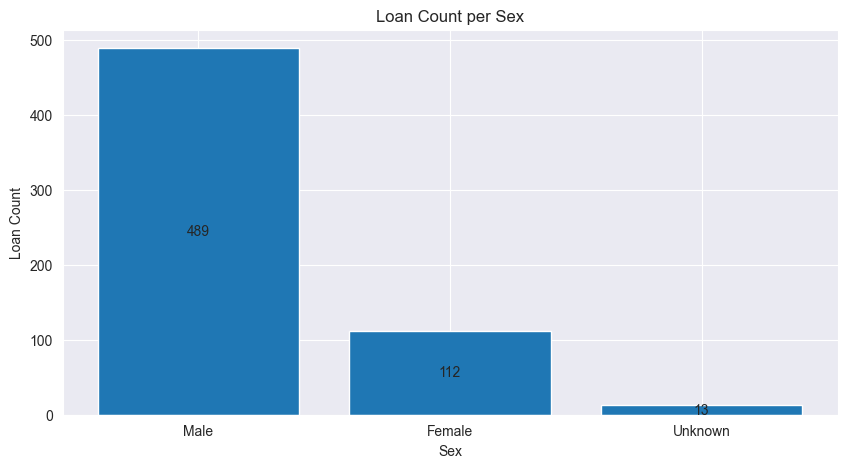

In [7]:
sex_labels = train_df['Gender'].fillna('Unknown').unique()
sex_vals = train_df['Gender'].fillna('Unknown').value_counts()

print('Total count:', sum(sex_vals))
print(f'Probabilities Sex: Male {sex_vals[0] / sum(sex_vals)}  Female {sex_vals[1] / sum(sex_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(sex_labels, sex_vals)
plt.bar_label(bar, sex_vals, label_type='center')
plt.xlabel('Sex')
plt.ylabel('Loan Count')
plt.title('Loan Count per Sex')
plt.show()

The first insight we can take from this bar plot is that we have an approximate ratio of 4:1 males to females taking loans in this dataset, 81.36% of the samples in the trianing dataset are males and 18.64% are females. We also have 13 missing values which we can fill with that 4:1 ratio.

Total count: 614
Probabilities Married: No 0.6482084690553745  Yes 0.3469055374592834


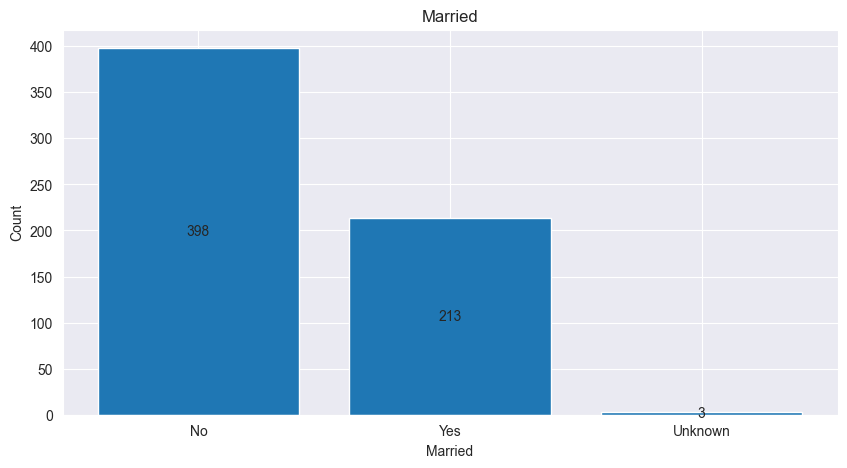

In [8]:
married_labels = train_df['Married'].fillna('Unknown').unique()
married_vals = train_df['Married'].fillna('Unknown').value_counts()

print('Total count:', sum(married_vals))
print(f'Probabilities Married: No {married_vals[0] / sum(married_vals)}  Yes {married_vals[1] / sum(married_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(married_labels, married_vals)
plt.bar_label(bar, married_vals, label_type='center')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married')
plt.show()

Again, we see a ratio of approximately 2:1 between people who have taken a loan and are married to those who aren't married, this ratio can be used to fill the nul values (3). This can later be combined with other information to correlate marriage to likelihood of payment.

Total count: 614
Probabilities Dependants: 0 deps 0.5618892508143323  1 dep 0.16612377850162866 2 deps 0.16449511400651465 3+ deps 0.08306188925081433


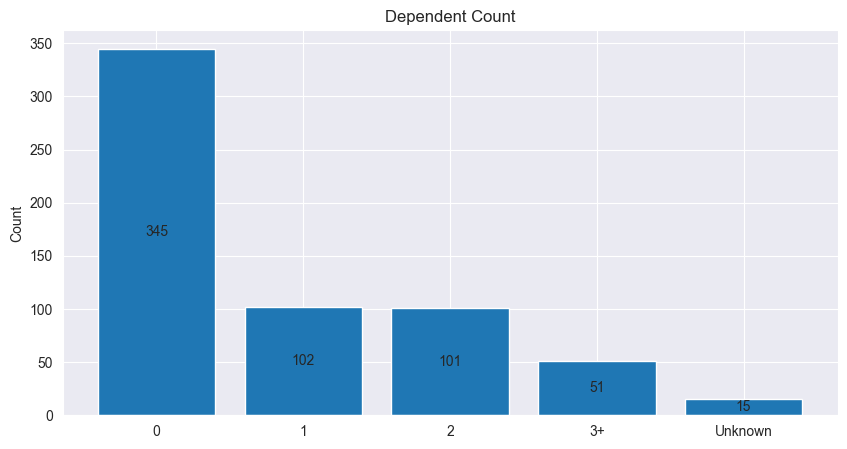

In [36]:
dependent_labels = train_df['Dependents'].fillna('Unknown').unique()
dependent_vals = train_df['Dependents'].fillna('Unknown').value_counts()

print('Total count:', sum(dependent_vals))
print(f'Probabilities Dependants: 0 deps {dependent_vals[0] / sum(dependent_vals)}  1 dep {dependent_vals[1] / sum(dependent_vals)} 2 deps {dependent_vals[2] / sum(dependent_vals)} 3+ deps {dependent_vals[3] / sum(dependent_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(dependent_labels, dependent_vals)
plt.bar_label(bar, dependent_vals, label_type='center')
plt.ylabel('Count')
plt.title('Dependent Count')
plt.show()

Total count: 614
Probabilities Education Level: Grad 0.7817589576547231  Not Grad 0.2182410423452769


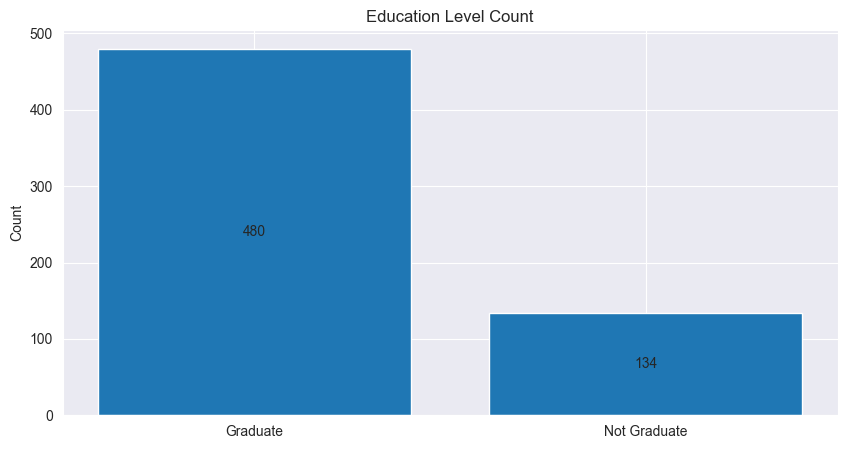

In [41]:
education_labels = train_df['Education'].fillna('Unknown').unique()
education_vals = train_df['Education'].fillna('Unknown').value_counts()

print('Total count:', sum(education_vals))
print(f'Probabilities Education Level: Grad {education_vals[0] / sum(education_vals)}  Not Grad {education_vals[1] / sum(education_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(education_labels, education_vals)
plt.bar_label(bar, education_vals, label_type='center')
plt.ylabel('Count')
plt.title('Education Level Count')
plt.show()

To my surprise, we see that an overwhelming majority of the individuals have graduate studies. Let's make a hypothesis. Based  on what we see here, we could say that higher education levels lead to higher probabilities of acquiring debt (loan).

Total count: 614
Probabilities Self Employed: No 0.8143322475570033  Yes 0.13355048859934854


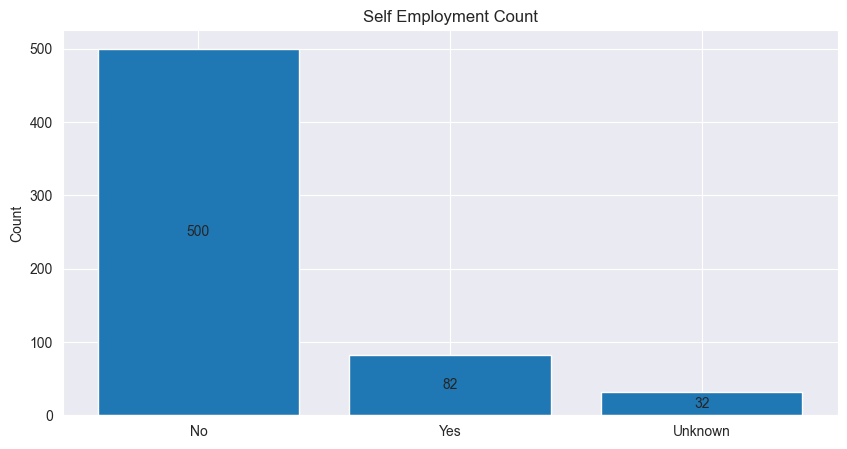

In [40]:
self_employed_labels = train_df['Self_Employed'].fillna('Unknown').unique()
self_employed_vals = train_df['Self_Employed'].fillna('Unknown').value_counts()

print('Total count:', sum(self_employed_vals))
print(f'Probabilities Self Employed: No {self_employed_vals[0] / sum(self_employed_vals)}  Yes {self_employed_vals[1] / sum(self_employed_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(self_employed_labels, self_employed_vals)
plt.bar_label(bar, self_employed_vals, label_type='center')
plt.ylabel('Count')
plt.title('Self Employment Count')
plt.show()

<AxesSubplot: ylabel='Frequency'>

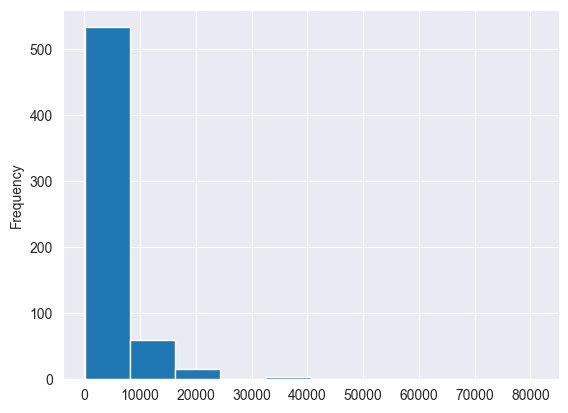

In [12]:
train_df['ApplicantIncome'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

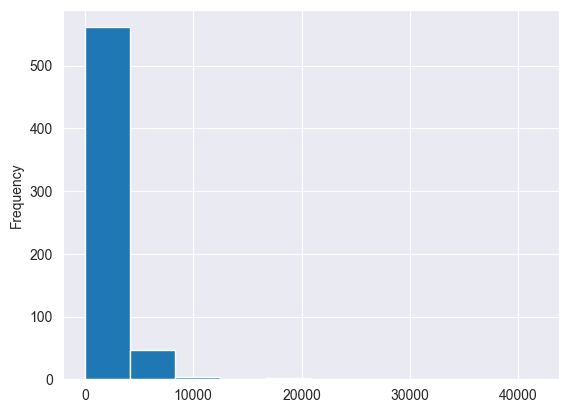

In [13]:
train_df['CoapplicantIncome'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

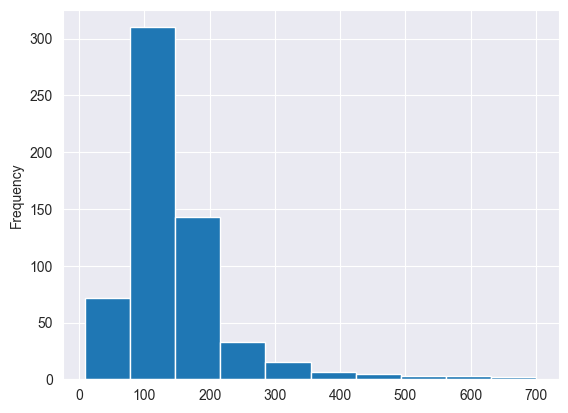

In [14]:
train_df['LoanAmount'].plot.hist()

Total count: 614


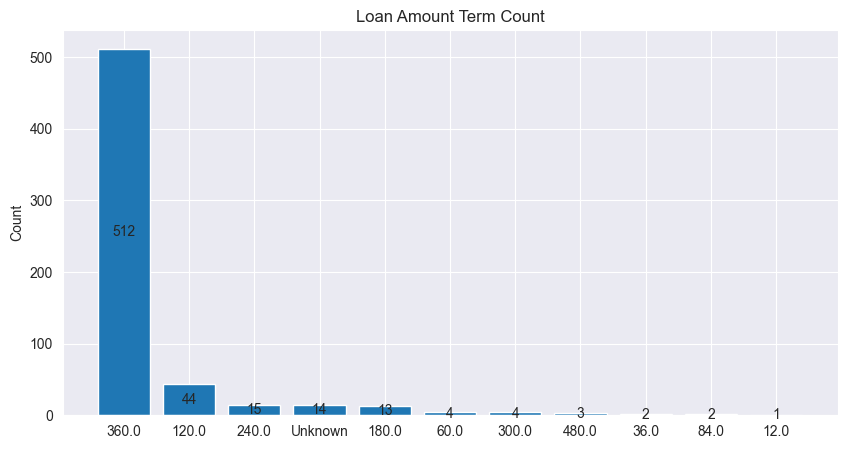

In [15]:
loan_amount_term_labels = train_df['Loan_Amount_Term'].fillna('Unknown').astype(str).unique()
loan_amount_term_vals = train_df['Loan_Amount_Term'].fillna('Unknown').value_counts()

print('Total count:', sum(loan_amount_term_vals))

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(loan_amount_term_labels, loan_amount_term_vals)
plt.bar_label(bar, loan_amount_term_vals, label_type='center')
plt.ylabel('Count')
plt.title('Loan Amount Term Count')
plt.show()

Total count: 614


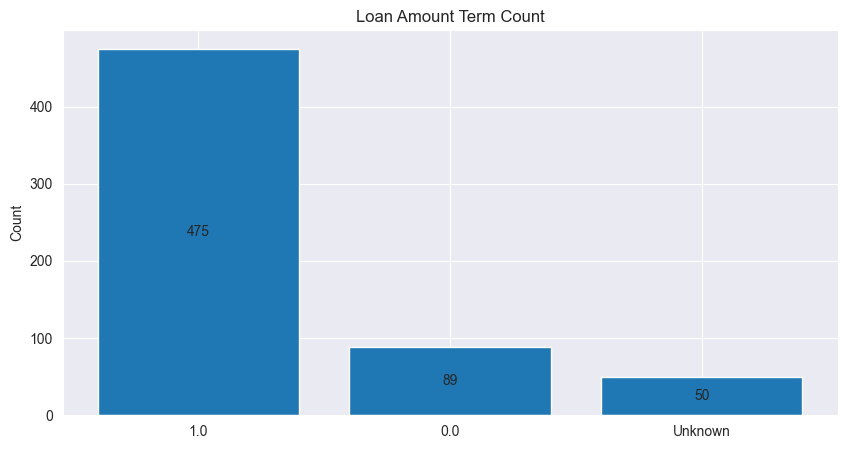

In [16]:
credit_hist_labels = train_df['Credit_History'].fillna('Unknown').astype(str).unique()
credit_hist_vals = train_df['Credit_History'].fillna('Unknown').value_counts()

print('Total count:', sum(credit_hist_vals))

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(credit_hist_labels, credit_hist_vals)
plt.bar_label(bar, credit_hist_vals, label_type='center')
plt.ylabel('Count')
plt.title('Loan Amount Term Count')
plt.show()

Total count: 614


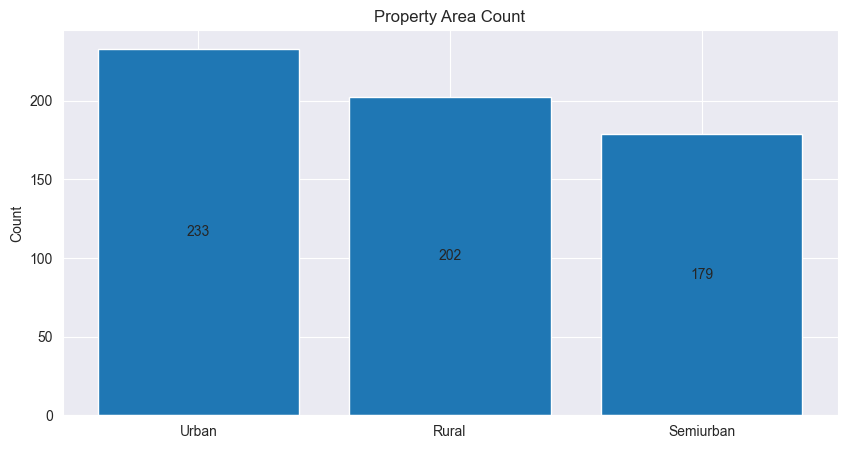

In [17]:
property_area_labels = train_df['Property_Area'].fillna('Unknown').unique()
property_area_vals = train_df['Property_Area'].fillna('Unknown').value_counts()

print('Total count:', sum(property_area_vals))

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(property_area_labels, property_area_vals)
plt.bar_label(bar, property_area_vals, label_type='center')
plt.ylabel('Count')
plt.title('Property Area Count')
plt.show()

Notice that the difference in number of samples between the three classes is within 5% to 8.7%. I would say this data on its own is inconclusive, so we cannot yet derive a hypothesis like a person is more likey to get a loan for a property in an urban area.

Total count: 614


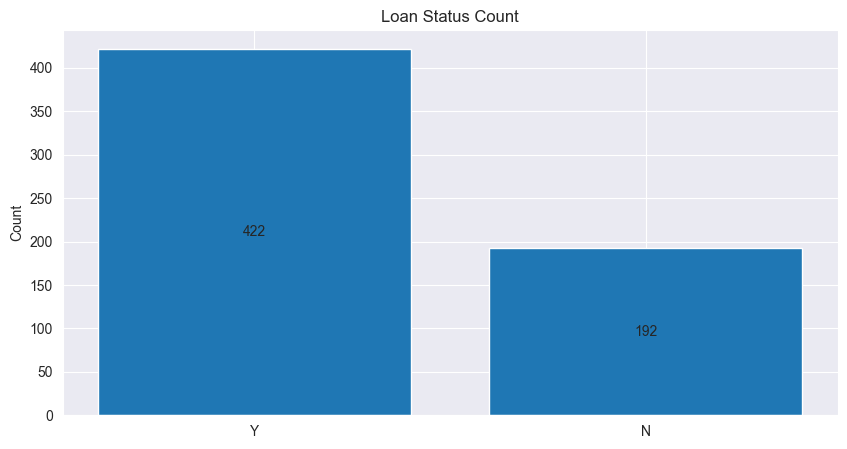

In [18]:
loan_status_labels = train_df['Loan_Status'].fillna('Unknown').unique()
loan_status_vals = train_df['Loan_Status'].fillna('Unknown').value_counts()

print('Total count:', sum(loan_status_vals))

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(loan_status_labels, loan_status_vals)
plt.bar_label(bar, loan_status_vals, label_type='center')
plt.ylabel('Count')
plt.title('Loan Status Count')
plt.show()

This is the label we will try to predict. Notice that we have an unbalanced dataset. What do I mean by unbalanced? Simply that there are significantly more samples of the class **Yes** than the class **No**. Unbalanced datasets lead to biased and "unfair" models because they are more precise, overfitted and whatnot to use in production. To deal with this problem we have several options:
1. Use some data augmentation technique to artificially increase the sample of the **No** class.
2. Increase the weight of **No** class samples during training.
3. Focus on metrics like precision, recall and F1 score rather than accuracy.

### Section 1.2 | Exploring visualizations of combined features
This section is focused on visualizing information by crossing data from features. These may help test hypotheses, uncover correlations and patterns in data.

<AxesSubplot: xlabel='Property_Area', ylabel='LoanAmount'>

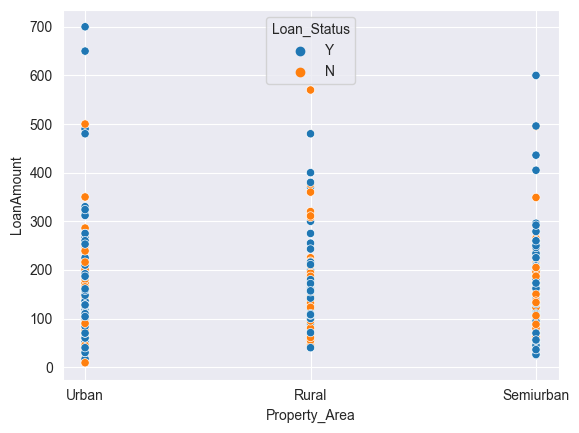

In [19]:
sns.scatterplot(x=train_df['Property_Area'], y=train_df['LoanAmount'], hue=train_df['Loan_Status'])

<AxesSubplot: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

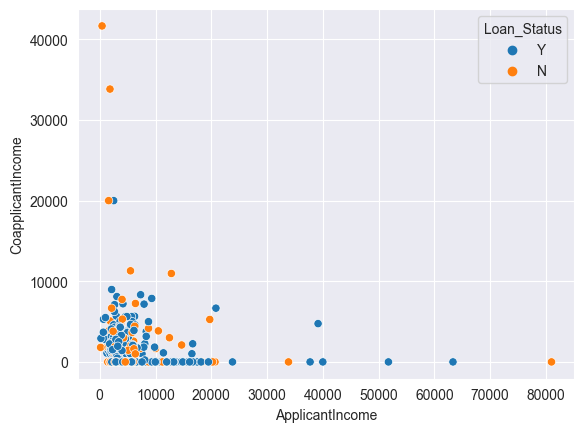

In [20]:
sns.scatterplot(x=train_df['ApplicantIncome'], y=train_df['CoapplicantIncome'], hue=train_df['Loan_Status'])

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

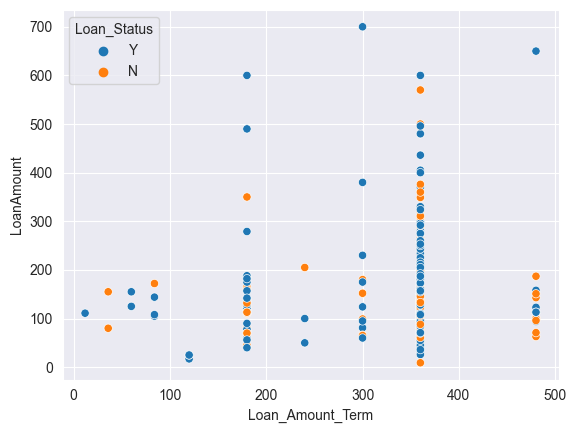

In [21]:
sns.scatterplot(x=train_df['Loan_Amount_Term'], y=train_df['LoanAmount'], hue=train_df['Loan_Status'])

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

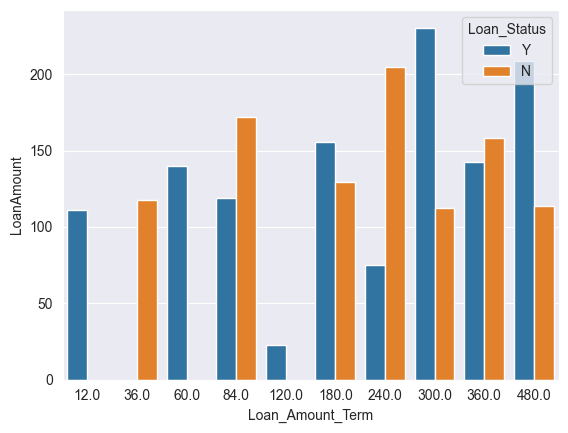

In [22]:
sns.barplot(x=train_df['Loan_Amount_Term'], y=train_df['LoanAmount'], hue=train_df['Loan_Status'], errorbar=None)

<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

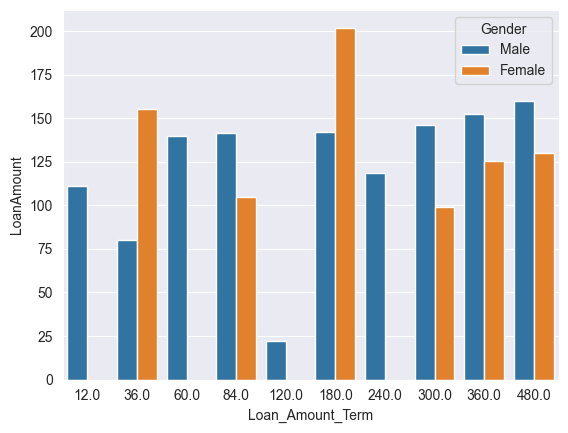

In [23]:
sns.barplot(x=train_df['Loan_Amount_Term'], y=train_df['LoanAmount'], hue=train_df['Gender'], errorbar=None)

## Section 2 | Data Preprocessing
This section is focused on dealing with empty values and cleaning data.

In [24]:
import numpy as np

In [25]:
print('Currently in directory:', os.getcwd())
path_to_datasets = input('\nEnter path to dataset directory: (e.g. ./data)')
name_of_train_ds = input('Enter the name of the train dataset file with its extension (e.g. train.csv)')

os.chdir(path_to_datasets)
train_df = pd.read_csv(os.getcwd() + f'\\{name_of_train_ds}')
train_df.head()

Currently in directory: C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
print('Currently in directory:', os.getcwd())
path_to_datasets = input('Enter path to dataset directory: (e.g. ./data)')
name_of_train_ds = input('Enter the name of the test dataset file with its extension (e.g. test.csv)')

os.chdir(path_to_datasets)
test_df = pd.read_csv(os.getcwd() + f'\\{name_of_train_ds}')
test_df.head()

Currently in directory: C:\Users\rmora\Documents\Cloud_Engineering\ML_Sample_Projects\classification_projects\loan_default_prediction\data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [27]:
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
test_df.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [29]:
[features for features in train_df.columns if train_df[features].isnull().sum() > 0]

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [30]:
train_df['Gender'] = train_df['Gender'].fillna(np.random.choice(['Male', 'Female'], p=[0.81, 0.19]))
train_df['Gender'].isnull().sum()

0

Total count: 614
Probabilities Sex: Male 0.8175895765472313  Female 0.18241042345276873


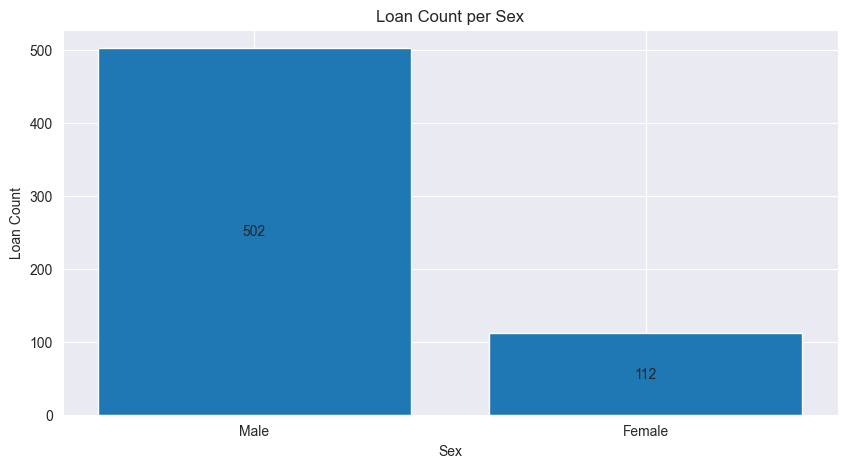

In [31]:
sex_labels = train_df['Gender'].fillna('Unknown').unique()
sex_vals = train_df['Gender'].fillna('Unknown').value_counts()

print('Total count:', sum(sex_vals))
print(f'Probabilities Sex: Male {sex_vals[0] / sum(sex_vals)}  Female {sex_vals[1] / sum(sex_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(sex_labels, sex_vals)
plt.bar_label(bar, sex_vals, label_type='center')
plt.xlabel('Sex')
plt.ylabel('Loan Count')
plt.title('Loan Count per Sex')
plt.show()

In [33]:
train_df['Married'] = train_df['Married'].fillna(np.random.choice(['No', 'Yes'], p=[0.65, 0.35]))
train_df['Married'].isnull().sum()

0

Total count: 614
Probabilities Married: No 0.6482084690553745  Yes 0.3517915309446254


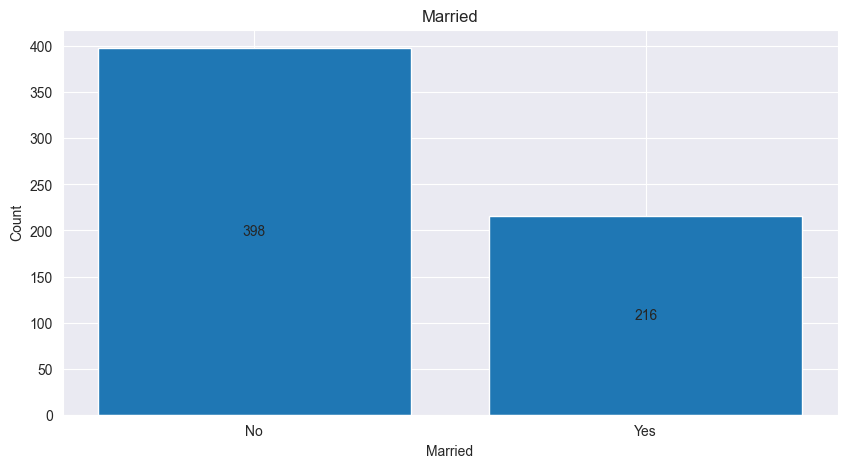

In [34]:
married_labels = train_df['Married'].fillna('Unknown').unique()
married_vals = train_df['Married'].fillna('Unknown').value_counts()

print('Total count:', sum(married_vals))
print(f'Probabilities Married: No {married_vals[0] / sum(married_vals)}  Yes {married_vals[1] / sum(married_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(married_labels, married_vals)
plt.bar_label(bar, married_vals, label_type='center')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Married')
plt.show()

In [38]:
train_df['Dependents'] = train_df['Dependents'].fillna(np.random.choice(['0', '1', '2', '3+'], p=[0.59, 0.17, 0.16, 0.08]))
train_df['Dependents'].isnull().sum()

0

Total count: 614
Probabilities Dependants: 0 deps 0.5863192182410424  1 dep 0.16612377850162866 2 deps 0.16449511400651465 3+ deps 0.08306188925081433


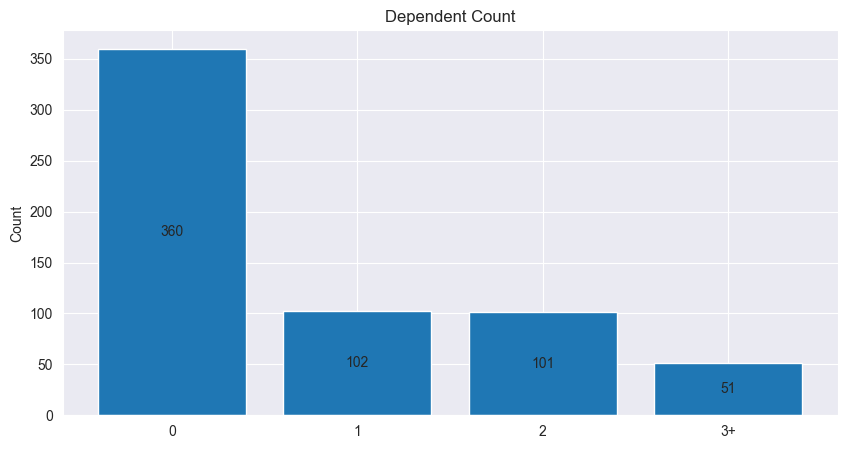

In [39]:
dependent_labels = train_df['Dependents'].fillna('Unknown').unique()
dependent_vals = train_df['Dependents'].fillna('Unknown').value_counts()

print('Total count:', sum(dependent_vals))
print(f'Probabilities Dependants: 0 deps {dependent_vals[0] / sum(dependent_vals)}  1 dep {dependent_vals[1] / sum(dependent_vals)} 2 deps {dependent_vals[2] / sum(dependent_vals)} 3+ deps {dependent_vals[3] / sum(dependent_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(dependent_labels, dependent_vals)
plt.bar_label(bar, dependent_vals, label_type='center')
plt.ylabel('Count')
plt.title('Dependent Count')
plt.show()

In [42]:
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(np.random.choice(['No', 'Yes'], p=[0.83, 0.17]))
train_df['Self_Employed'].isnull().sum()

0

Total count: 614
Probabilities Self Employed: No 0.8664495114006515  Yes 0.13355048859934854


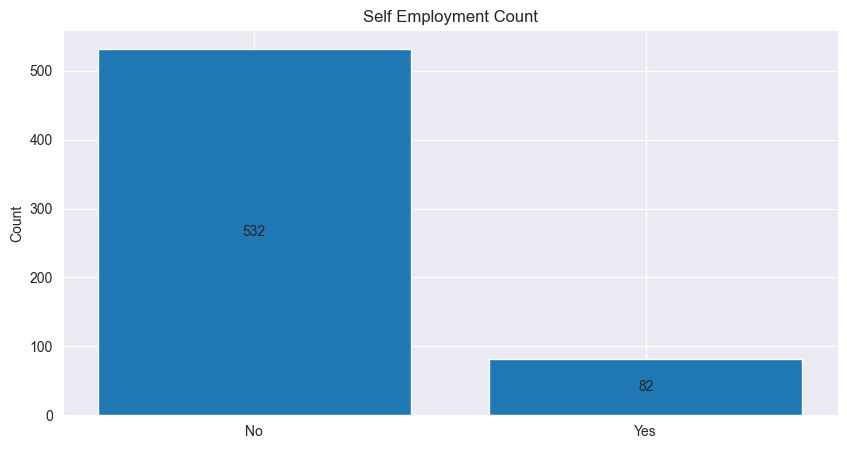

In [44]:
self_employed_labels = train_df['Self_Employed'].fillna('Unknown').unique()
self_employed_vals = train_df['Self_Employed'].fillna('Unknown').value_counts()

print('Total count:', sum(self_employed_vals))
print(f'Probabilities Self Employed: No {self_employed_vals[0] / sum(self_employed_vals)}  Yes {self_employed_vals[1] / sum(self_employed_vals)}')

fig = plt.figure(figsize=(10, 5))
bar = plt.bar(self_employed_labels, self_employed_vals)
plt.bar_label(bar, self_employed_vals, label_type='center')
plt.ylabel('Count')
plt.title('Self Employment Count')
plt.show()

## Section 3 | Feature Engineering
This section is dedicated to feature manipulation and transformation as well as deriving new features from existing ones. Some examples of the procedures we will take on are:

* Encoding non-numeric features
*

## Section 4 | Model Training
This section is focused on training several models using different sets of features and algorithms. Our challenge consists in training a model using strictly classical ML algorithms, hence we will rely on **xgboost** and **sklearn** to build our models. When dealing with tabular data gradient boosted algorithms tend to be the best performers, so we will employ decision trees, random forests and their gradient boosted versions and finally compare these to an extreme boosted classifier.

In [ ]:
from sklearn.linear_model import